(1920, 1080, 3)


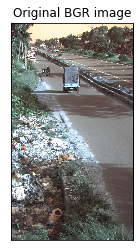

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image
img = cv2.imread("1.jpg")
print(img.shape)
plt.title('Original BGR image')
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()
org_img=img

(1920, 1080, 3)


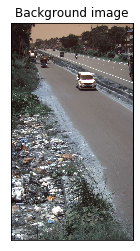

In [3]:
background= cv2.imread("back.jpg")
print(background.shape)
plt.title('Background image')
plt.imshow(background)
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
#cv2.imshow('original_img',img)
per=50
width= int( (img.shape[1]*per) / 100)
height= int ((img.shape[0]*per) /100 )
dim=(width, height)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
print(img.shape)
image=img
#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


In [5]:
#cv2.imshow('original_img',img)
per1=50
width1= int( (background.shape[1]*per) / 100)
height1= int ((background.shape[0]*per) /100 )
dim1=(width1, height1)
background = cv2.resize(background,dim1, interpolation = cv2.INTER_AREA)
print(background.shape)

#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


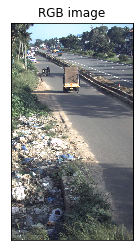

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('RGB image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
image=img

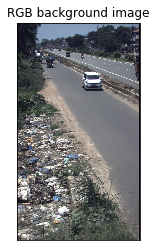

In [7]:
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.title('RGB background image')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


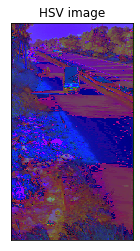

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.title('HSV image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

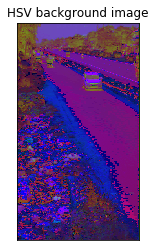

In [9]:
background= cv2.cvtColor(background, cv2.COLOR_RGB2HSV)
plt.title('HSV background image')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
H, S, V = cv2.split(img)
print(H.dtype)
print(S.dtype)
print(V.dtype)
Hold=H
Sold=S
Vold=V

BH,BS,BV= cv2.split(background)

uint8
uint8
uint8


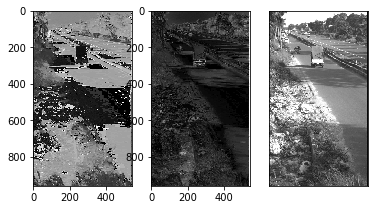

In [11]:

plt.title('HSV components image')
plt.subplot(131)
plt.imshow(H, cmap='gray')
plt.subplot(132)
plt.imshow(S, cmap='gray')
plt.subplot(133)
plt.imshow(V, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

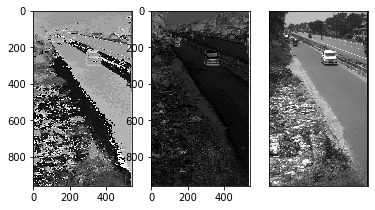

In [12]:

plt.title('HSV components background image')
plt.subplot(131)
plt.imshow(BH, cmap='gray')
plt.subplot(132)
plt.imshow(BS, cmap='gray')
plt.subplot(133)
plt.imshow(BV, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
alpha1 = 0.2 ; beta1 = 0.8 ; thetas= 1; thetah= 1
s=V
print(s.shape)


(960, 540)


In [14]:
import sys
V = np.float32(V)/255
BV= np.float32(BV)/255
S = np.float32(S)/255
BS= np.float32(BS)/255
H = np.float32(H)/255
BH= np.float32(BH)/255
s= V.copy()



In [15]:
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        try:
            x= V[i,j]/ BV[i,j]
        except ZeroDivisionError:
            x = 0
        
        if ( (alpha1 <= x <= beta1) and (abs(S[i,j]-BS[i,j])<= thetas) and (abs(H[i,j]-BH[i,j])<=thetah)) :
            s[i,j]=1
        else:
            s[i,j]=0
            
s=s*255

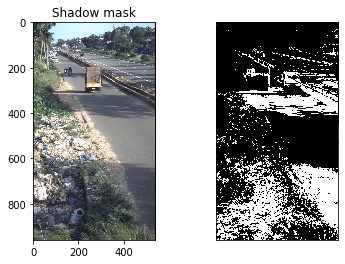

In [16]:
s = np.array(s,dtype=np.uint8)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Shadow mask')
plt.subplot(122)
plt.imshow(s, cmap= 'gray')


plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
print(type(s))
print(s.dtype)

<class 'numpy.ndarray'>
uint8


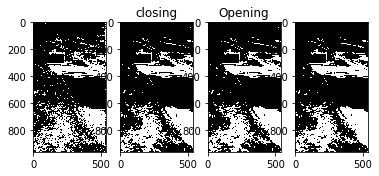

In [18]:


plt.subplot(141)
plt.imshow(s, cmap= 'gray')

median = cv2.medianBlur(s, 5)
plt.subplot(142)
plt.imshow(median, cmap = 'gray')
# Closing - Good for removing noise
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)
plt.title('closing')
plt.subplot(143)
plt.imshow(closing, cmap = 'gray')


# Opening - Good for removing noise
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
plt.title('Opening')
plt.subplot(144)
plt.imshow(opening, cmap = 'gray')


(960, 540)
uint8
(960, 540, 3)
uint8
(960, 540, 3)


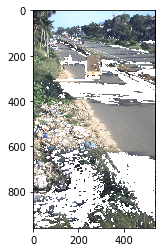

In [19]:
opening = np.array(opening,dtype=np.uint8)
print(opening.shape)
print(opening.dtype)
print(image.shape)
print(image.dtype)

result = image.copy()
height=result.shape[0]
width=result.shape[1]
blank_image = np.zeros((height,width,3), np.uint8)
print(blank_image.shape)
#result[opening!=0] = (0,0,0)

result[opening!=0] = (255,255,255)

plt.imshow(result, cmap = 'gray')
#plt.imshow(blank_image, cmap = 'gray')

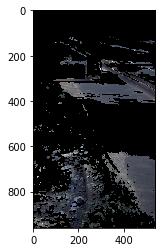

In [20]:
blank_image[opening!=0] = image[opening!=0]
plt.imshow(blank_image, cmap = 'gray')


uint8


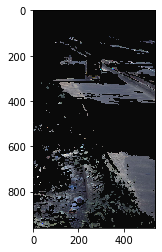

In [21]:
blank_image1=np.uint8(np.double(blank_image)*1.1 + 10)
plt.imshow(blank_image1, cmap = 'gray')
print(blank_image1.dtype)

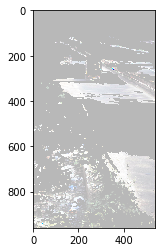

In [22]:
equ = np.zeros((height,width,3), np.uint8)
equ[:,:,0] = cv2.equalizeHist(blank_image1[:,:,0])
equ[:,:,1] = cv2.equalizeHist(blank_image1[:,:,1])
equ[:,:,2] = cv2.equalizeHist(blank_image1[:,:,2])
plt.imshow(equ, cmap = 'gray')

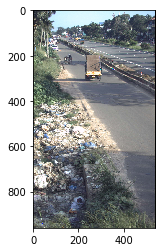

In [23]:
blank_image1[opening==0]=image[opening==0]
plt.imshow(blank_image1, cmap = 'gray')

In [24]:
equ = cv2.equalizeHist(np.uint8(blank_image1))
plt.imshow(equ, cmap = 'gray')

error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/histogram.cpp:3345: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


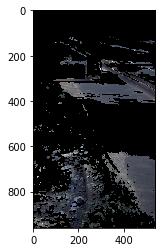

In [25]:
roi=image.copy()
roi[:,:,0] = cv2.bitwise_and(roi[:,:,0], roi[:, :,0], mask=opening)
roi[:,:,1] = cv2.bitwise_and(roi[:,:,1], roi[:, :,1], mask=opening)
roi[:,:,2] = cv2.bitwise_and(roi[:,:,2], roi[:, :,2], mask=opening)
plt.imshow(roi)

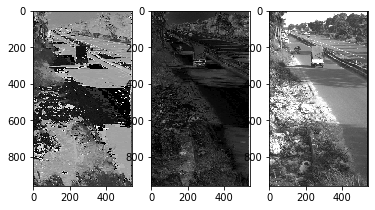

In [26]:
V=V*255
H= H*255
S=S*255
#opening=opening*255
V = np.array(V,dtype=np.uint8)
H = np.array(H,dtype=np.uint8)
S = np.array(S,dtype=np.uint8)
plt.subplot(131)
plt.imshow(H, cmap = 'gray')
plt.subplot(132)
plt.imshow(S, cmap = 'gray')
plt.subplot(133)
plt.imshow(V, cmap = 'gray')

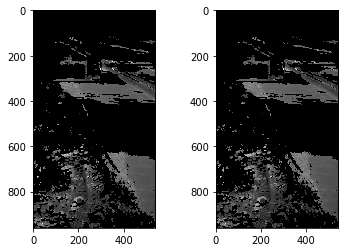

In [27]:

opening = np.array(opening,dtype=np.uint8)
roi = cv2.bitwise_and(V, V, mask=opening)
plt.title('ROI')
plt.subplot(121)
plt.imshow(roi, cmap = 'gray')
roi=roi*1
plt.subplot(122)
plt.imshow(roi, cmap = 'gray')




In [155]:
print(opening.dtype)

uint8


In [156]:
print(S.dtype)
print(H.dtype)
print(roi.dtype)
hsv1= [H, S, roi]
hsv1= np.array(hsv1, dtype=np.uint8)
print(type(hsv1))
print(hsv1.dtype)

uint8
uint8
uint8
<class 'numpy.ndarray'>
uint8


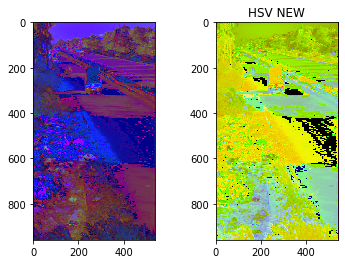

In [157]:
hsvnew=cv2.merge([H, S, roi])

plt.subplot(121) 
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.title('HSV NEW')
plt.imshow(hsvnew, cmap = 'gray')

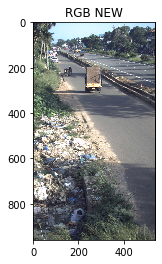

In [158]:
rgbold= cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
plt.title('RGB NEW')
plt.imshow(rgbold, cmap = 'gray')

<class 'numpy.ndarray'>
uint8


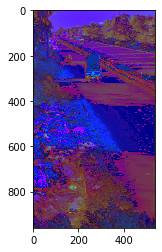

In [116]:
hsvold= cv2.merge([Hold, Sold, Vold])
#rgbold1 = cv2.cvtColor(hsvold, cv2.COLOR_HSV2RGB)
#plt.title('RGB OLD')
plt.imshow(hsvold, cmap = 'gray')
print(type(hsvold))
print(hsvold.dtype)

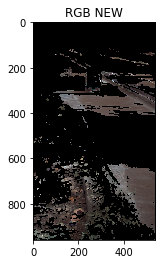

In [117]:
enhanced = cv2.cvtColor(hsvnew, cv2.COLOR_HSV2BGR)
enhanced1 = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)
plt.title('RGB NEW')
plt.imshow(enhanced, cmap = 'gray')